### Cristian Adolfo Baquero Pico 
2021

# **Desgaste y rendimiento de empleados de IBM HR Analytics**

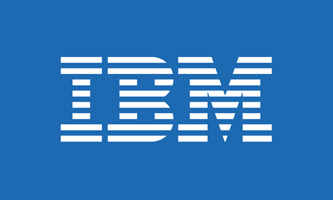

Predecir el desgaste de sus empleados más valiosos

# **1. Entendimiento del negocio**

## **Objetivos de negocio**

La deserción es un problema que afecta a todas las empresas, independientemente de la geografía, la industria y el tamaño de la empresa. La deserción de empleados genera costos significativos para una empresa, incluido el costo de la interrupción del negocio, la contratación de nuevo personal y la capacitación de nuevo personal. Como tal, existe un gran interés empresarial en comprender los factores que impulsan y minimizar el desgaste del personal.

Este conjunto de datos presenta una encuesta de empleados de IBM, que indica si hay deserción o no. El conjunto de datos contiene aproximadamente 1500 entradas.

## **Metas del Proyecto de machine learning**

Predecir el desgaste de los empleados más valiosos. Descubrir los factores que conducen al desgaste de los empleados y explorar cuestiones importantes como "La relación entre la distancia de la casa al trabajo por puesto de trabajo y el desgaste" o "La relación entre el ingreso mensual promedio por educación y desgaste". Este es un conjunto de datos ficticios creado por científicos de datos de IBM

# **2. Entendimiento de los datos**

## Importación de librerías

In [171]:
!pip install -U plotly
!pip install seaborn --upgrade
!pip install -U scikit-learn

In [316]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# Visualización de grafos con graphviz.
import graphviz 

In [173]:
# Configuraciones de Matplotlib
%matplotlib inline   
plt.rcParams['figure.dpi'] = 80  

# Estilo por defecto para notebooks.
sns.set_theme('notebook')

## **Recolección inicial de datos**

In [174]:
!wget -q --no-check-certificate 'https://drive.google.com/uc?id=164xzDVHC0mNORc8bZCdvQb24HLy_ypUr&export=download' -O IBM_data.csv  

In [175]:
df_ibm = pd.read_csv('IBM_data.csv')

In [176]:
df_ibm.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## **Descripción de los datos**

In [177]:
df_ibm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [178]:
df_ibm.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [179]:
df_ibm.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [180]:
cols_categoric = ['Attrition', 'BusinessTravel', 'Department', 'Education', 
                  'EducationField', 'EnvironmentSatisfaction', 'Gender', 
                  'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
                  'MaritalStatus', 'OverTime', 'PerformanceRating',
                  'RelationshipSatisfaction', 'StockOptionLevel', 
                  'WorkLifeBalance']

cols_numeric = ['Age', 'DailyRate', 'DistanceFromHome',
                'HourlyRate', 'MonthlyIncome', 'MonthlyRate',
                'NumCompaniesWorked', 'PercentSalaryHike', 
                'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
                'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

useless_cols = ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']

#'EmployeeCount' y 'EmployeeNumber' no sirven, puede que 'Over18', 'StandardHours' tampoco

## **Exploración de los datos**

In [181]:
df_ibm.mean()

Age                            36.923810
DailyRate                     802.485714
DistanceFromHome                9.192517
Education                       2.912925
EmployeeCount                   1.000000
EmployeeNumber               1024.865306
EnvironmentSatisfaction         2.721769
HourlyRate                     65.891156
JobInvolvement                  2.729932
JobLevel                        2.063946
JobSatisfaction                 2.728571
MonthlyIncome                6502.931293
MonthlyRate                 14313.103401
NumCompaniesWorked              2.693197
PercentSalaryHike              15.209524
PerformanceRating               3.153741
RelationshipSatisfaction        2.712245
StandardHours                  80.000000
StockOptionLevel                0.793878
TotalWorkingYears              11.279592
TrainingTimesLastYear           2.799320
WorkLifeBalance                 2.761224
YearsAtCompany                  7.008163
YearsInCurrentRole              4.229252
YearsSinceLastPr

In [182]:
df_ibm.median()

Age                            36.0
DailyRate                     802.0
DistanceFromHome                7.0
Education                       3.0
EmployeeCount                   1.0
EmployeeNumber               1020.5
EnvironmentSatisfaction         3.0
HourlyRate                     66.0
JobInvolvement                  3.0
JobLevel                        2.0
JobSatisfaction                 3.0
MonthlyIncome                4919.0
MonthlyRate                 14235.5
NumCompaniesWorked              2.0
PercentSalaryHike              14.0
PerformanceRating               3.0
RelationshipSatisfaction        3.0
StandardHours                  80.0
StockOptionLevel                1.0
TotalWorkingYears              10.0
TrainingTimesLastYear           3.0
WorkLifeBalance                 3.0
YearsAtCompany                  5.0
YearsInCurrentRole              3.0
YearsSinceLastPromotion         1.0
YearsWithCurrManager            3.0
dtype: float64

In [183]:
for col in df_ibm.columns:
  print('Moda de "'+str(col)+'": ' + str(list(df_ibm[col].mode())))

Moda de "Age": [35]
Moda de "Attrition": ['No']
Moda de "BusinessTravel": ['Travel_Rarely']
Moda de "DailyRate": [691]
Moda de "Department": ['Research & Development']
Moda de "DistanceFromHome": [2]
Moda de "Education": [3]
Moda de "EducationField": ['Life Sciences']
Moda de "EmployeeCount": [1]
Moda de "EmployeeNumber": [1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 30, 31, 32, 33, 35, 36, 38, 39, 40, 41, 42, 45, 46, 47, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 68, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 85, 86, 88, 90, 91, 94, 95, 96, 97, 98, 100, 101, 102, 103, 104, 105, 106, 107, 110, 112, 113, 116, 117, 118, 119, 120, 121, 124, 125, 126, 128, 129, 131, 132, 133, 134, 137, 138, 139, 140, 141, 142, 143, 144, 145, 147, 148, 150, 151, 152, 153, 154, 155, 158, 159, 160, 161, 162, 163, 164, 165, 167, 169, 170, 171, 174, 175, 176, 177, 178, 179, 182, 183, 184, 190, 192, 193, 194, 195, 197, 198, 199, 200, 201, 202, 20

In [184]:
print("***** Evaluamos Curtosis (Apuntamiento) *****\n")
lista_curtosis = pd.DataFrame(columns=['columna', 'tipo', 'Curtosis'], index=range(df_ibm.columns.size))
i = 0
for col in df_ibm.columns:
  if df_ibm[col].dtype != 'object':
    kurt = df_ibm[col].kurt()
    if kurt >= -0.2 and kurt <= 0.2:
      lista_curtosis.iloc[i] = (col, 'Mesocúrtica ("Normal")', kurt)
    elif kurt < -0.2:
      lista_curtosis.iloc[i] = (col, 'Platicúrtica ("Aplanada")', kurt)
    else:
      lista_curtosis.iloc[i] = (col, 'Leptocúrtica ("Con Punta")', kurt)
  i = i + 1

lista_curtosis.dropna()

***** Evaluamos Curtosis (Apuntamiento) *****



,columna,tipo,Curtosis
0,Age,"Platicúrtica (""Aplanada"")",-0.404145
3,DailyRate,"Platicúrtica (""Aplanada"")",-1.20382
5,DistanceFromHome,"Platicúrtica (""Aplanada"")",-0.224833
6,Education,"Platicúrtica (""Aplanada"")",-0.559115
8,EmployeeCount,"Mesocúrtica (""Normal"")",0
9,EmployeeNumber,"Platicúrtica (""Aplanada"")",-1.22318
10,EnvironmentSatisfaction,"Platicúrtica (""Aplanada"")",-1.20252
12,HourlyRate,"Platicúrtica (""Aplanada"")",-1.1964
13,JobInvolvement,"Leptocúrtica (""Con Punta"")",0.270999
14,JobLevel,"Leptocúrtica (""Con Punta"")",0.399152


In [185]:
print("***** Evaluamos Asimetría (skewness) *****\n")
lista_skewness = pd.DataFrame(columns=['columna', 'tipo', 'skewness'], index=range(df_ibm.columns.size))
i = 0
for col in df_ibm.columns:
  if df_ibm[col].dtype != 'object':
    skew = df_ibm[col].skew()
    if skew >= -0.2 and skew <= 0.2:
      lista_skewness.iloc[i] = (col, 'Distribución Normal', skew)
    elif skew < -0.2:
      lista_skewness.iloc[i] = (col, 'Sesgo a la Derecha', skew)
    else:
      lista_skewness.iloc[i] = (col, 'Sesgo a la Izquierda', skew)
  i = i + 1

lista_skewness.dropna()

***** Evaluamos Asimetría (skewness) *****



,columna,tipo,skewness
0,Age,Sesgo a la Izquierda,0.413286
3,DailyRate,Distribución Normal,-0.00351857
5,DistanceFromHome,Sesgo a la Izquierda,0.958118
6,Education,Sesgo a la Derecha,-0.289681
8,EmployeeCount,Distribución Normal,0
9,EmployeeNumber,Distribución Normal,0.016574
10,EnvironmentSatisfaction,Sesgo a la Derecha,-0.321654
12,HourlyRate,Distribución Normal,-0.032311
13,JobInvolvement,Sesgo a la Derecha,-0.498419
14,JobLevel,Sesgo a la Izquierda,1.0254


In [186]:
px.imshow(abs(df_ibm.drop(columns=useless_cols).corr()), width=800, height=800)

## **Verificación de la calidad de los datos**

Visualización de datos estadísticos

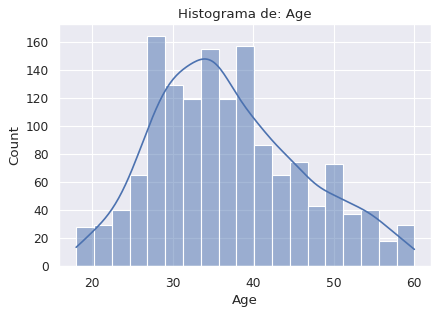

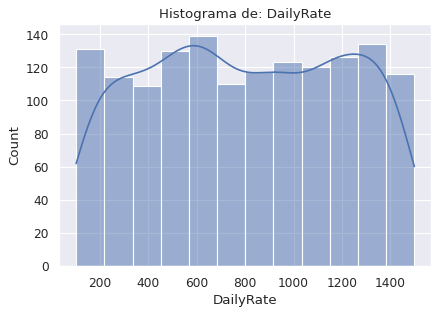

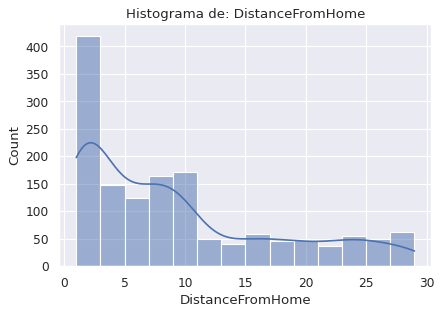

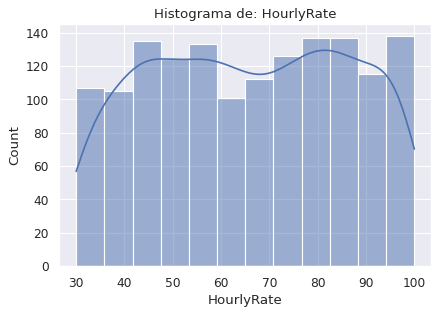

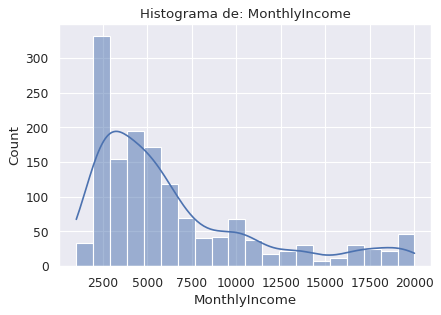

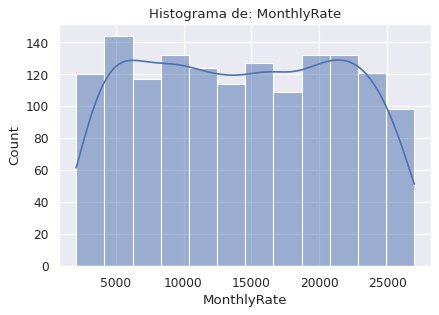

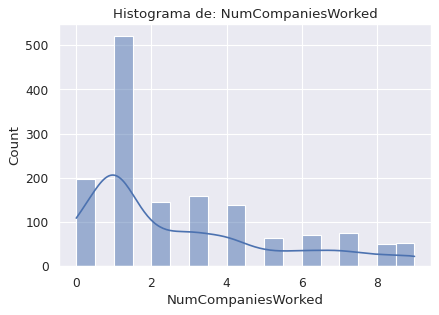

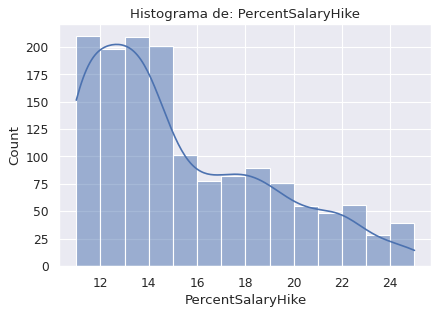

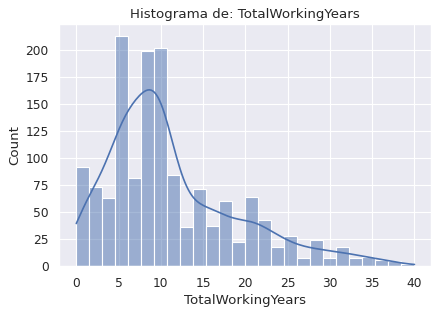

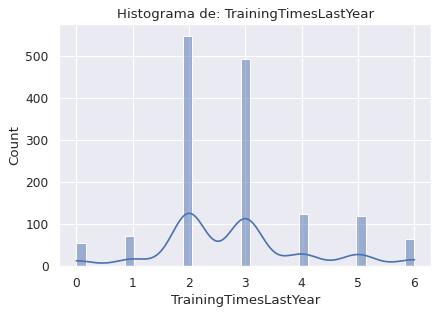

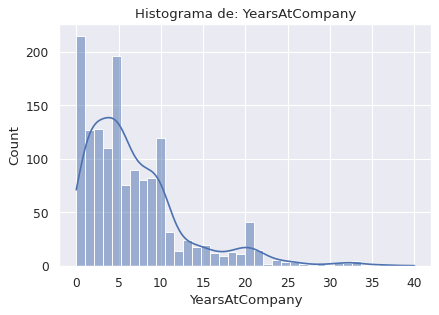

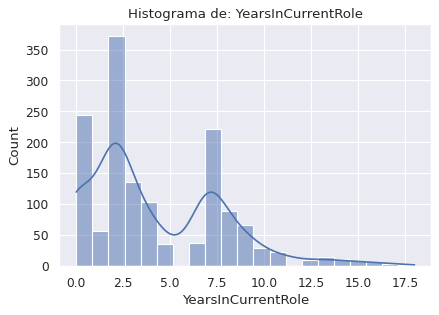

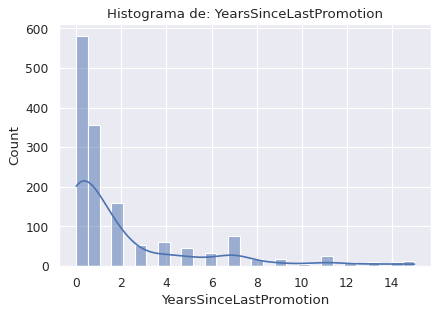

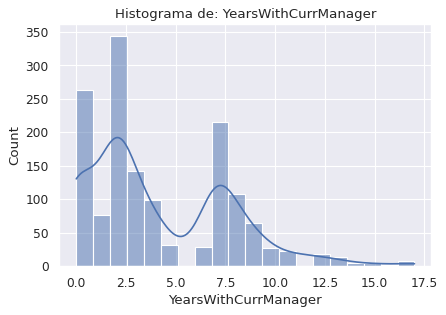

In [187]:
for col in cols_numeric:
  fig, ax = plt.subplots()
  ax.set_title('Histograma de: ' + str(col))
  sns.histplot(ax=ax, data=df_ibm[col], kde=True);

In [188]:
fig = make_subplots(rows=5, cols=3, subplot_titles=(cols_numeric))
k=0
for i in range(1,6):
  for j in range(1,4):
    if i == 5 and j == 3:
      break
    fig.add_trace(go.Box(y=df_ibm[cols_numeric[k]]),row=i, col=j)
    k=k+1

fig.update_layout(height=2500, width=1000, title_text="Boxplot")
fig.show()

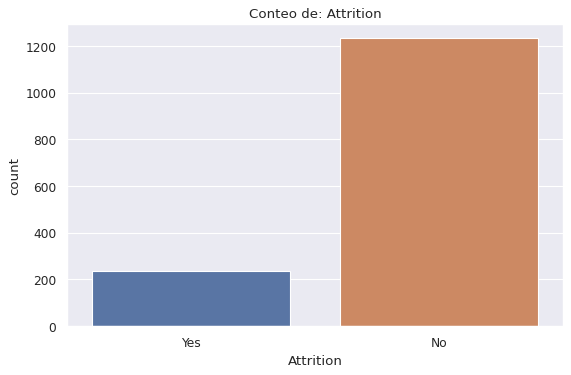

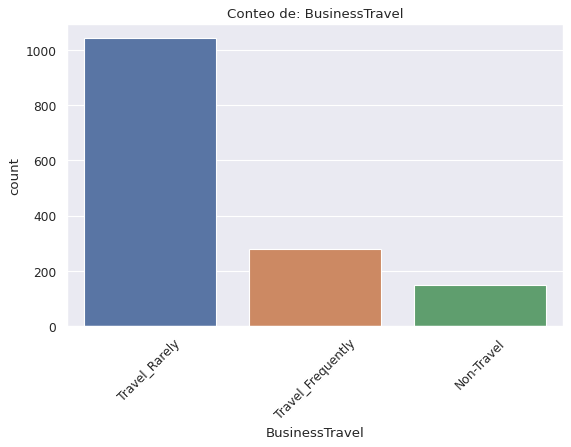

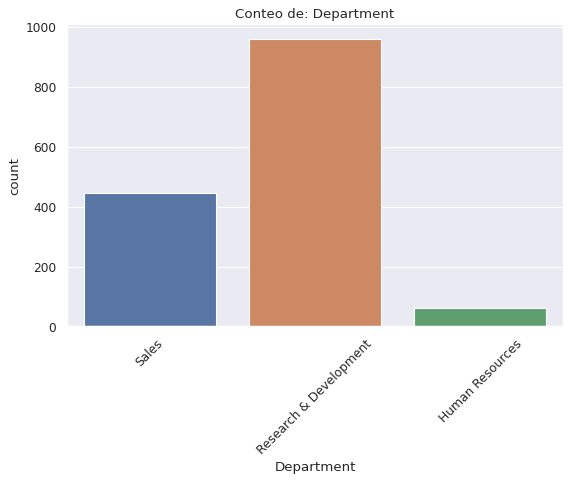

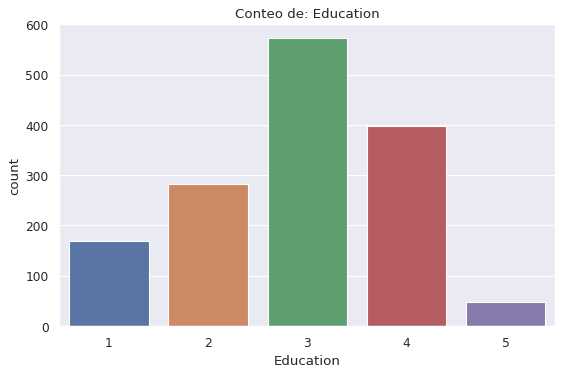

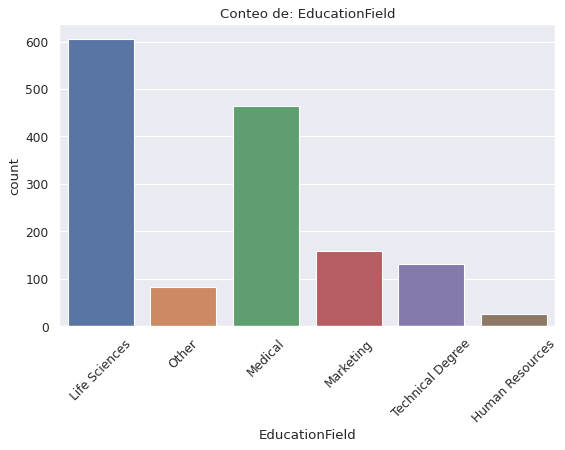

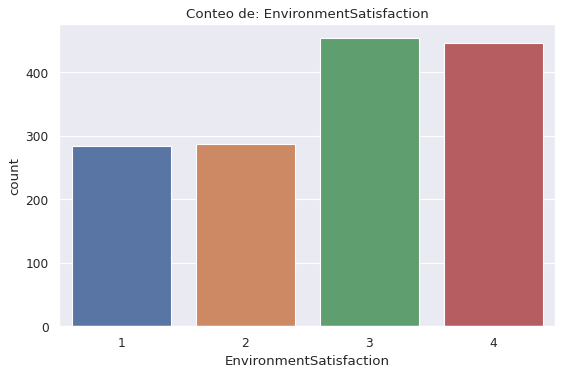

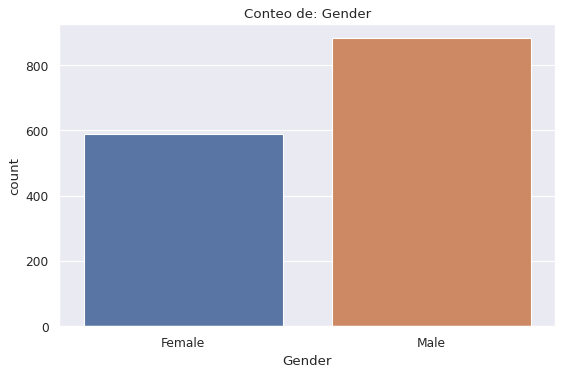

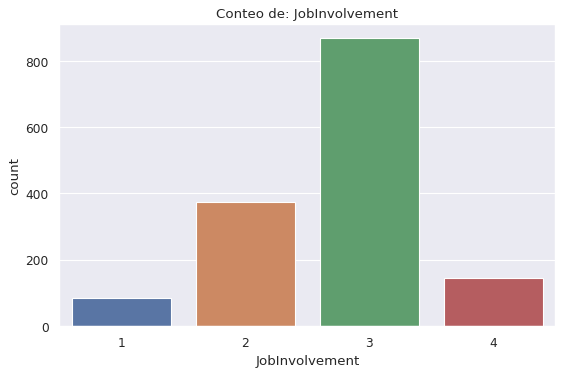

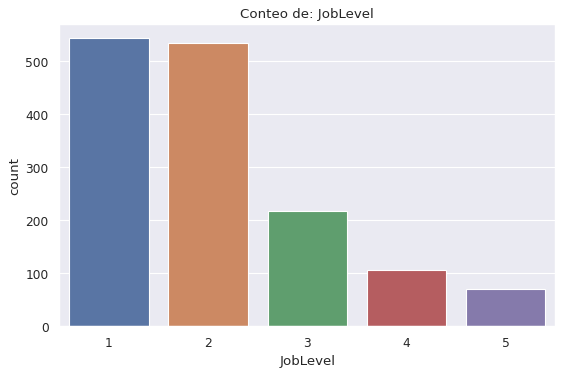

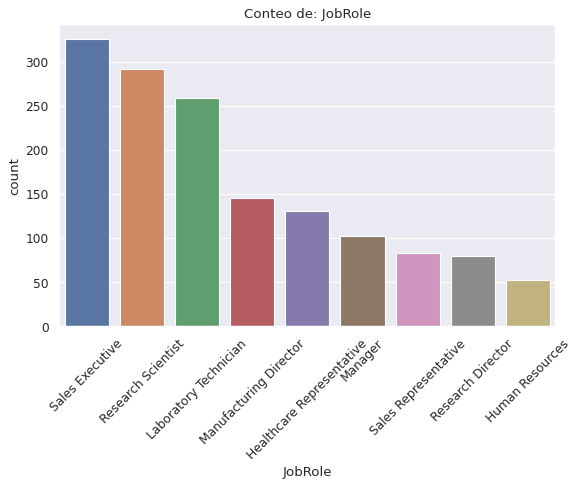

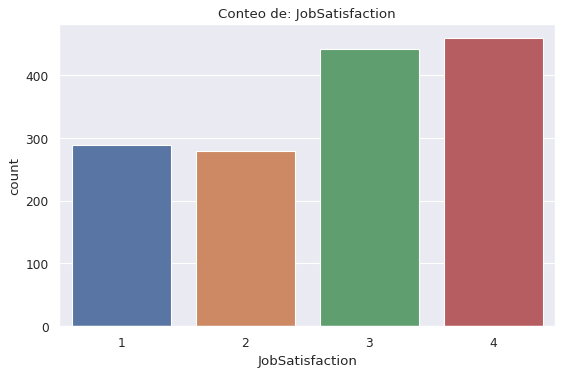

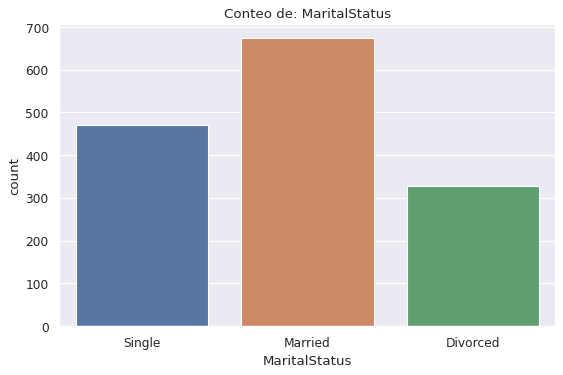

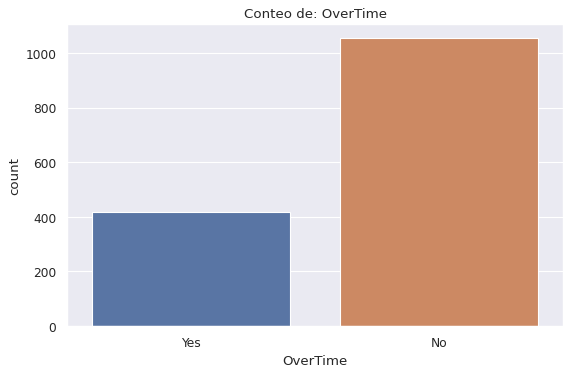

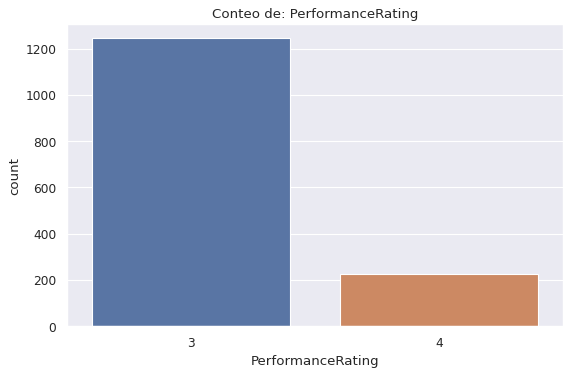

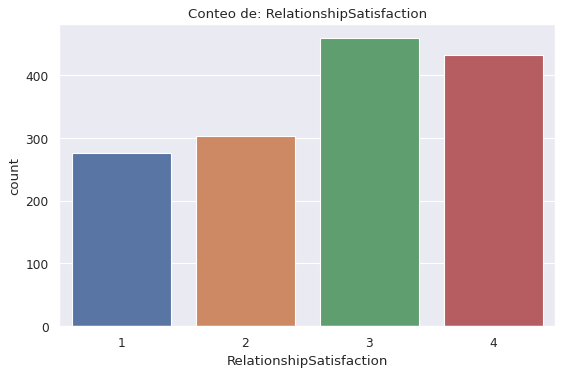

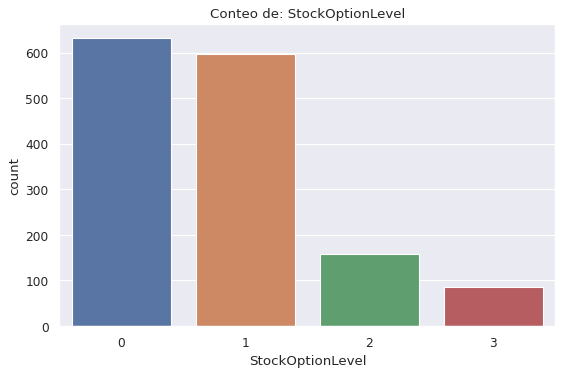

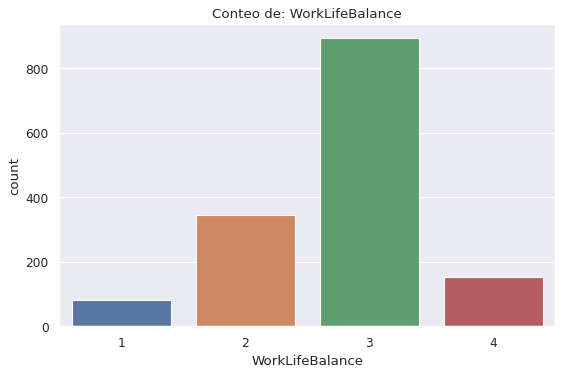

In [189]:
for col in cols_categoric:
  fig, ax = plt.subplots(figsize=(8, 5))
  ax.set_title('Conteo de: ' + str(col))
  sns.countplot(ax=ax, x=col, data=df_ibm);
  if col in ['BusinessTravel', 'Department', 'EducationField', 'JobRole']:
    plt.xticks(rotation=45)

# **3. Preparación de los datos**

## **Selección de Datos finales y Limpieza de los datos**

In [190]:
# Borramos las columnas innecesarias
df_ibm.drop(columns=useless_cols, inplace=True)

In [191]:
df_ibm

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8


In [192]:
X = df_ibm.drop(['Attrition'], axis=1)
y = df_ibm['Attrition']

In [193]:
y.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [194]:
# Eliminamos el label de la lista de columnas categoricas
cols_categoric.remove('Attrition')

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, stratify=y)   # Estratificar con respecto a la etiqueta.

In [196]:
print('I. Partición de entrenamiento:\n')

print(f"Tamaño de X: {X_train.shape}")
print(f"Valores únicos de y:\n", y_train.value_counts())

print('\nII. Partición de prueba:\n')
print(f"Tamaño de X: {X_test.shape}")
print(f"Valores únicos de y:\n", y_test.value_counts())

I. Partición de entrenamiento:

Tamaño de X: (1029, 30)
Valores únicos de y:
 No     863
Yes    166
Name: Attrition, dtype: int64

II. Partición de prueba:

Tamaño de X: (441, 30)
Valores únicos de y:
 No     370
Yes     71
Name: Attrition, dtype: int64


**Preprocesamiento**

In [197]:
X_categoric = X_train[cols_categoric].values
X_numeric = X_train[cols_numeric].values

In [198]:
# Hacemos escalamiento estandar a las variables numéricas

scaler = StandardScaler()  # Declaramos el Transformer "StandardScaler"
X_numeric_standarized = scaler.fit_transform(X_numeric) # Transformamos la matriz "X_numeric"
X_numeric_standarized.shape

(1029, 14)

In [199]:
# Hacemos preprocesamiento a las variables categoricas

encoder = OneHotEncoder(sparse=False)     # Declaramos el Transformer "OneHotEncoder".
X_categoric_onehot = encoder.fit_transform(X_categoric) # Usamos "fit_transform" para obtener la matriz transformada.
print(X_categoric_onehot.shape)

(1029, 64)


In [200]:
X_full_train = np.concatenate((X_numeric_standarized, X_categoric_onehot),
                        axis=1) # Concatenamos por el eje vertical (columnas)
print(X_full_train.shape)

(1029, 78)


In [201]:
names_out_cols_categoric = encoder.get_feature_names_out(cols_categoric)

In [202]:
new_cols_names = np.concatenate((cols_numeric, names_out_cols_categoric), axis=None)

In [203]:
X_full_train_df = pd.DataFrame(data=X_full_train, columns=new_cols_names)
X_full_train_df

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_1,Education_2,Education_3,Education_4,Education_5,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,Gender_Female,Gender_Male,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,PerformanceRating_3,PerformanceRating_4,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,1.134786,-1.404089,-0.879602,-1.480016,-0.414998,0.461412,-1.066712,1.816293,-0.412080,-0.654010,-0.008565,0.486610,1.418443,0.825977,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.142036,-0.948692,-1.002612,-1.383174,-0.779923,-1.185867,-0.666403,-0.600820,-0.541594,-0.654010,-0.008565,0.486610,0.820868,-1.154553,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.078575,-0.448746,1.088564,0.359981,-0.928868,-0.948264,-0.666403,-0.600820,-0.412080,-0.654010,0.151681,-0.897363,-0.374283,0.825977,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.362647,-1.206090,-1.002612,1.086295,-0.878430,-1.079861,0.134214,1.816293,-0.541594,0.121308,-0.489303,-0.620569,-0.673071,-0.305754,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.071325,0.843194,0.965553,-0.705280,-0.733796,-0.156579,-1.066712,0.204884,-0.671109,0.121308,-0.329057,-0.620569,-0.374283,-0.871620,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,0.142036,1.422339,0.104481,0.021034,-0.814411,-0.329572,-1.066712,0.473452,-1.059652,-2.204646,-0.809794,-0.897363,-0.673071,-0.588687,0.0,1.0,0.0

In [204]:
X_train = X_full_train
#y_train no cambia

In [205]:
y_train.value_counts()

No     863
Yes    166
Name: Attrition, dtype: int64

Aplicamos el preprocesamiento ya "entrenado" a los datos de test

In [206]:
X_categoric_test = X_test[cols_categoric].values
X_numeric_test = X_test[cols_numeric].values

In [207]:
# Hacemos escalamiento estandar a las variables numéricas

X_numeric_standarized_test = scaler.transform(X_numeric_test)
X_numeric_standarized_test.shape

(441, 14)

In [208]:
# Hacemos preprocesamiento a las variables categoricas

X_categoric_onehot_test = encoder.transform(X_categoric_test) # Usamos "fit_transform" para obtener la matriz transformada.
print(X_categoric_onehot_test.shape)

(441, 64)


In [209]:
X_full_test = np.concatenate((X_numeric_standarized_test, X_categoric_onehot_test),
                        axis=1) # Concatenamos por el eje vertical (columnas)
print(X_full_test.shape)

(441, 78)


In [210]:
X_test = X_full_test
# y_test queda igual

In [211]:
y_test.value_counts()

No     370
Yes     71
Name: Attrition, dtype: int64

# **4. Modelamiento y Evaluación**

## **Selección de un modelo apropiado para el problema**

Como es un problema de aprendizaje supervisado, probaremos con los siguientes modelos:


*   K-vecinos más cercanos
*   Clasificador Naive Bayes 
*   Random Forest - M2U3 - Métodos de clasificación no lineal
*   Maquinas de vectores de soporte - M2U3 - Métodos de clasificación no lineal
*   Redes Neuronales - 2. M2U3 - Análisis de series de tiempo con redes neuronales



## **Diseño de la Experimentación (validación cruzada) y Construcción y Entrenamiento de los Modelos**

#### Funciones auxiliares

In [212]:
# Función para visualizar la curva de aprendizaje a partir 
# del error de entrenamiento y de generalización.
def plot_learning_curve(train_error, generalization_error):
  
  balance_point = np.array(generalization_error).argmin() + 1
  plt.figure(figsize = (8, 5), dpi = 105)

  plt.plot(range(1, k_values + 1), train_error, label="Entrenamiento")
  plt.plot(range(1, k_values + 1), generalization_error, label="Validación")
  plt.xticks(range(0, k_values + 1, 5))
  plt.xlabel("k-vecinos")
  plt.ylabel("Error")
  y_min, y_max = plt.gca().get_ylim() 
  plt.vlines(balance_point, y_min, y_max, colors = ['red'], linestyles = ['dashdot'])
  plt.ylim([y_min, y_max])
  plt.text(balance_point + 1, 0.165, 'Punto de balance')
  plt.legend();

In [213]:
# Gráfica de la varianza explicada acumulada.

def cumulative_explained_variance_plot(expl_variance):

  cum_var_exp = np.cumsum(expl_variance)

  plt.figure(dpi = 100, figsize = (8, 6))
  plt.title('Curva acumulativa de la varianza explicada VS n° de componentes principales', 
            fontdict= dict(family ='serif', size = 16))
  plt.xlabel('Número de componentes principales',
             fontdict= dict(family ='serif', size = 14))
  plt.ylabel('Varianza explicada acumulativa',
             fontdict= dict(family ='serif', size = 14))  

  nc = np.arange(1, expl_variance.shape[0] + 1)

  plt.plot(nc, cum_var_exp, '--r')
  plt.plot(nc, cum_var_exp, 'c*', ms = 5)   
  plt.show()

In [214]:
def list_confusion_matrix(cm,classes):
  df = pd.DataFrame(data = cm,
                    index = pd.MultiIndex.from_product([['Valor real'], classes]),
                    columns = pd.MultiIndex.from_product([['Valor predicho'], classes]))
  
  return df

### **K-vecinos más cercanos**

In [215]:
k_values = 50
train_error = []
generalization_error = []

for nn in range(1, k_values + 1):
    knn = KNeighborsClassifier(n_neighbors=nn)
    knn.fit(X_train, y_train)
    train_error.append(1 - knn.score(X_train, y_train))
    generalization_error.append(1 - knn.score(X_test, y_test))

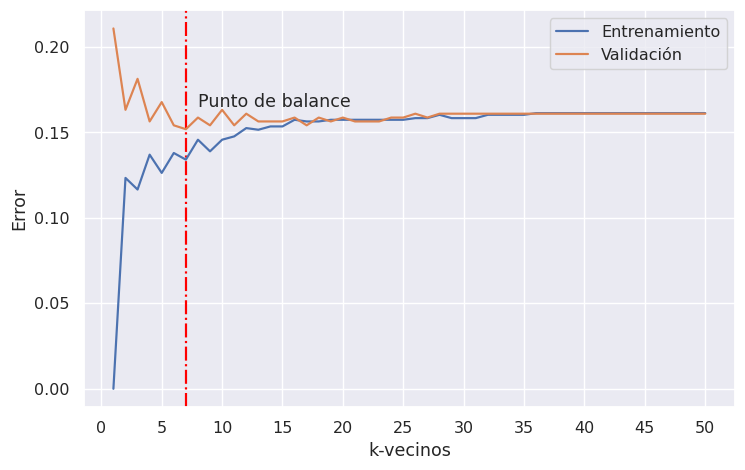

In [216]:
plot_learning_curve(train_error, generalization_error)

In [217]:
pca = PCA() 
transf = pca.fit_transform(X_train)

varianza_expl = pca.explained_variance_ratio_

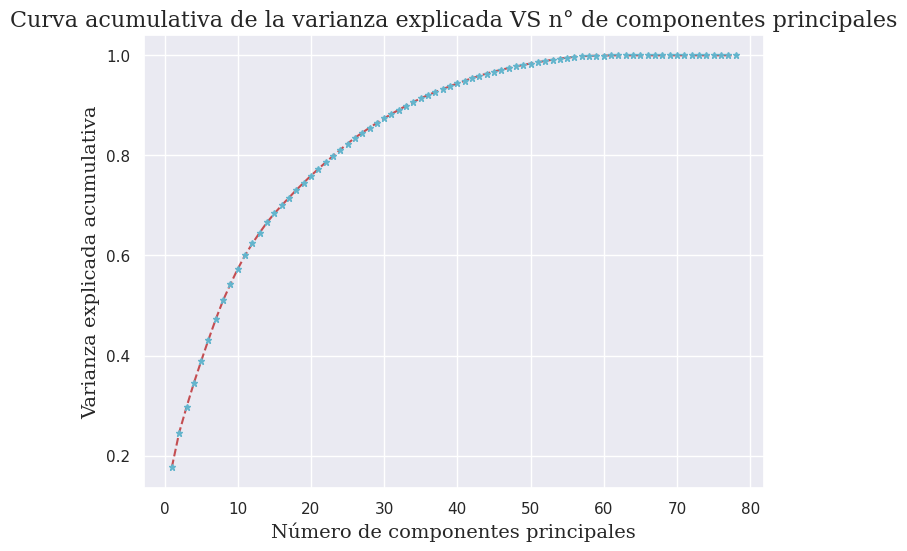

In [218]:
cumulative_explained_variance_plot(varianza_expl)

#### Primero sin PCA

In [219]:
param_grid = {'n_neighbors': [3, 6, 9], 
              'weights': ['uniform', 'distance']}

param_grid

{'n_neighbors': [3, 6, 9], 'weights': ['uniform', 'distance']}

In [220]:
grid_knn_sin_pca = GridSearchCV(KNeighborsClassifier(), 
                        param_grid=param_grid, 
                        verbose=1, 
                        cv=5,
                        return_train_score=True
                        )

grid_knn_sin_pca.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 6, 9],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, verbose=1)

In [221]:
print(grid_knn_sin_pca.best_params_)
print(grid_knn_sin_pca.best_score_)

{'n_neighbors': 6, 'weights': 'distance'}
0.848392138290315


In [222]:
grid_knn_sin_pca.score(X_test, y_test)

0.8367346938775511

In [223]:
y_pred = grid_knn_sin_pca.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
list_confusion_matrix(cnf_matrix, ['No', 'Yes'])

Valor predicho    
                           No Yes
Valor real No             363   7
           Yes             65   6

In [224]:
print(classification_report(y_test,    
                            y_pred,                                
                            target_names=['No', 'Yes'],  
                            digits=4)) 

              precision    recall  f1-score   support

          No     0.8481    0.9811    0.9098       370
         Yes     0.4615    0.0845    0.1429        71

    accuracy                         0.8367       441
   macro avg     0.6548    0.5328    0.5263       441
weighted avg     0.7859    0.8367    0.7863       441



#### Con PCA

In [225]:
estimators = [
    ('pca', PCA()),
    ('knn', KNeighborsClassifier())]

In [226]:
parameters = {      
    'pca__n_components': [2,20,40,60,78],
    'knn__n_neighbors': [3,6,9],   
    'knn__weights': ['uniform', 'distance']       
}

In [227]:
pipeline = Pipeline(estimators)

In [228]:
grid_knn_con_pca = GridSearchCV(pipeline,   
                           parameters, 
                           cv=5,       
                           verbose=0) # = 3 para más info

In [229]:
grid_knn_con_pca.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 6, 9],
                         'knn__weights': ['uniform', 'distance'],
                         'pca__n_components': [2, 20, 40, 60, 78]})

In [230]:
print(f"Mejor score: {grid_knn_con_pca.best_score_}")
print("Mejor configuración de parámetros:")

best_parameters = grid_knn_con_pca.best_params_
for param in sorted(parameters.keys()):
    print(f"\t{param}: {best_parameters[param]}")

Mejor score: 0.8484016102296945
Mejor configuración de parámetros:
	knn__n_neighbors: 6
	knn__weights: uniform
	pca__n_components: 2


In [231]:
y_pred = grid_knn_con_pca.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
list_confusion_matrix(cnf_matrix, ['No', 'Yes'])

Valor predicho    
                           No Yes
Valor real No             362   8
           Yes             65   6

In [232]:
print(classification_report(y_test,    
                            y_pred,                                
                            target_names=['No', 'Yes'],  
                            digits=4)) 

              precision    recall  f1-score   support

          No     0.8478    0.9784    0.9084       370
         Yes     0.4286    0.0845    0.1412        71

    accuracy                         0.8345       441
   macro avg     0.6382    0.5314    0.5248       441
weighted avg     0.7803    0.8345    0.7849       441



### **Clasificador Naive Bayes**

In [233]:
from sklearn.naive_bayes import GaussianNB

#### Primero sin PCA

In [234]:
naiveB_clf = GaussianNB()
naiveB_clf.fit(X_train, y_train)

GaussianNB()

In [235]:
naiveB_clf.score(X_test, y_test)

0.7006802721088435

In [236]:
y_pred = naiveB_clf.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
list_confusion_matrix(cnf_matrix, ['No', 'Yes'])

Valor predicho     
                           No  Yes
Valor real No             255  115
           Yes             17   54

In [237]:
print(classification_report(y_test,    
                            y_pred,                                
                            target_names=['No', 'Yes'],  
                            digits=4)) 

              precision    recall  f1-score   support

          No     0.9375    0.6892    0.7944       370
         Yes     0.3195    0.7606    0.4500        71

    accuracy                         0.7007       441
   macro avg     0.6285    0.7249    0.6222       441
weighted avg     0.8380    0.7007    0.7389       441



#### Con PCA

In [238]:
estimators = [
    ('pca', PCA()),
    ('knn', GaussianNB())]

In [239]:
parameters = {      
    'pca__n_components': [2,5,10,15,20,25,30,40,60,78],     
}

In [240]:
pipeline = Pipeline(estimators)

In [241]:
grid_naiveB_con_pca = GridSearchCV(pipeline,   
                           parameters, 
                           cv=5,       
                           verbose=0) # = 3 para más info

In [242]:
grid_naiveB_con_pca.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()), ('knn', GaussianNB())]),
             param_grid={'pca__n_components': [2, 5, 10, 15, 20, 25, 30, 40, 60,
                                               78]})

In [243]:
print(f"Mejor score: {grid_naiveB_con_pca.best_score_}")
print("Mejor configuración de parámetros:")

best_parameters = grid_naiveB_con_pca.best_params_
for param in sorted(parameters.keys()):
    print(f"\t{param}: {best_parameters[param]}")

Mejor score: 0.874643618280843
Mejor configuración de parámetros:
	pca__n_components: 40


In [244]:
grid_naiveB_con_pca.score(X_test, y_test)

0.8662131519274376

In [245]:
y_pred = grid_naiveB_con_pca.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
list_confusion_matrix(cnf_matrix, ['No', 'Yes'])

Valor predicho    
                           No Yes
Valor real No             356  14
           Yes             45  26

In [246]:
print(classification_report(y_test,    
                            y_pred,                                
                            target_names=['No', 'Yes'],  
                            digits=4)) 

              precision    recall  f1-score   support

          No     0.8878    0.9622    0.9235       370
         Yes     0.6500    0.3662    0.4685        71

    accuracy                         0.8662       441
   macro avg     0.7689    0.6642    0.6960       441
weighted avg     0.8495    0.8662    0.8502       441



### **Random Forest**

In [247]:
from sklearn.ensemble import RandomForestClassifier

In [248]:
param_grid = {'n_estimators': [10,25,50,100], 
              'criterion': ['gini', 'entropy'],
              'min_samples_split': [2,4,6],
              'max_features': ['auto', 'sqrt', 'log2'],
              'class_weight': ['balanced', 'balanced_subsample', None]}

param_grid

{'class_weight': ['balanced', 'balanced_subsample', None],
 'criterion': ['gini', 'entropy'],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_split': [2, 4, 6],
 'n_estimators': [10, 25, 50, 100]}

In [249]:
grid_rf_sin_pca = GridSearchCV(RandomForestClassifier(n_jobs=-1), 
                        param_grid=param_grid, 
                        verbose=1, 
                        n_jobs= -1,
                        cv=5,
                        return_train_score=True
                        )

grid_rf_sin_pca.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample',
                                          None],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 25, 50, 100]},
             return_train_score=True, verbose=1)

In [250]:
print(grid_rf_sin_pca.best_params_)
print(grid_rf_sin_pca.best_score_)

{'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_split': 6, 'n_estimators': 50}
0.8639497987212883


In [251]:
grid_rf_sin_pca.score(X_test, y_test)

0.8662131519274376

In [252]:
y_pred = grid_rf_sin_pca.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
list_confusion_matrix(cnf_matrix, ['No', 'Yes'])

Valor predicho    
                           No Yes
Valor real No             366   4
           Yes             55  16

In [253]:
print(classification_report(y_test,    
                            y_pred,                                
                            target_names=['No', 'Yes'],  
                            digits=4)) 

              precision    recall  f1-score   support

          No     0.8694    0.9892    0.9254       370
         Yes     0.8000    0.2254    0.3516        71

    accuracy                         0.8662       441
   macro avg     0.8347    0.6073    0.6385       441
weighted avg     0.8582    0.8662    0.8330       441



### **Maquinas de vectores de soporte**

In [254]:
from sklearn.svm import SVC

In [255]:
param_grid = {'C':     [2**i for i in range(-5, 7, 1)], 
              'gamma': [2**i for i in range(-5, 7, 1)],
              'kernel': ['poly','rbf','sigmoid']}

param_grid

{'C': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64],
 'gamma': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64],
 'kernel': ['poly', 'rbf', 'sigmoid']}

In [256]:
grid_svc_sin_pca = GridSearchCV(SVC(), 
                        param_grid=param_grid, 
                        verbose=1, 
                        n_jobs= -1,
                        cv=5,
                        return_train_score=True
                        )

grid_svc_sin_pca.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8,
                               16, 32, 64],
                         'gamma': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4,
                                   8, 16, 32, 64],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             return_train_score=True, verbose=1)

In [257]:
print(grid_svc_sin_pca.best_params_)
print(grid_svc_sin_pca.best_score_)

{'C': 4, 'gamma': 0.03125, 'kernel': 'rbf'}
0.8911626805588444


In [258]:
grid_svc_sin_pca.score(X_test, y_test)

0.873015873015873

In [259]:
y_pred = grid_svc_sin_pca.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
list_confusion_matrix(cnf_matrix, ['No', 'Yes'])

Valor predicho    
                           No Yes
Valor real No             360  10
           Yes             46  25

In [260]:
print(classification_report(y_test,    
                            y_pred,                                
                            target_names=['No', 'Yes'],  
                            digits=4)) 

              precision    recall  f1-score   support

          No     0.8867    0.9730    0.9278       370
         Yes     0.7143    0.3521    0.4717        71

    accuracy                         0.8730       441
   macro avg     0.8005    0.6625    0.6998       441
weighted avg     0.8589    0.8730    0.8544       441



### **Redes Neuronales**

In [261]:
from sklearn.neural_network import MLPClassifier

In [262]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (100,50,25), (40,20,10)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [10**-i for i in range(0, 6, 1)],
    'learning_rate': ['constant','adaptive'],
    'max_iter': [100, 200, 300, 500, 1000]
}

param_grid

{'activation': ['logistic', 'tanh', 'relu'],
 'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05],
 'hidden_layer_sizes': [(150, 100, 50), (100, 50, 25), (40, 20, 10)],
 'learning_rate': ['constant', 'adaptive'],
 'max_iter': [100, 200, 300, 500, 1000],
 'solver': ['lbfgs', 'sgd', 'adam']}

In [263]:
grid_rn_sin_pca = GridSearchCV(MLPClassifier(max_iter=150), 
                        param_grid=param_grid, 
                        n_jobs= -1,
                        verbose=3, 
                        cv=5,
                        return_train_score=True
                        )

grid_rn_sin_pca.fit(X_train, y_train)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.



GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=150), n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(150, 100, 50), (100, 50, 25),
                                                (40, 20, 10)],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [100, 200, 300, 500, 1000],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             return_train_score=True, verbose=3)

In [264]:
print(grid_rn_sin_pca.best_params_)
print(grid_rn_sin_pca.best_score_)

{'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (100, 50, 25), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'sgd'}
0.8989391427894862


In [265]:
grid_rn_sin_pca.score(X_test, y_test)

0.8843537414965986

In [266]:
y_pred = grid_rn_sin_pca.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
list_confusion_matrix(cnf_matrix, ['No', 'Yes'])

Valor predicho    
                           No Yes
Valor real No             359  11
           Yes             40  31

In [267]:
print(classification_report(y_test,    
                            y_pred,                                
                            target_names=['No', 'Yes'],  
                            digits=4)) 

              precision    recall  f1-score   support

          No     0.8997    0.9703    0.9337       370
         Yes     0.7381    0.4366    0.5487        71

    accuracy                         0.8844       441
   macro avg     0.8189    0.7034    0.7412       441
weighted avg     0.8737    0.8844    0.8717       441



# **5. Evaluación Final**

## **Análisis de los resultados**

Revisamos las métricas de todos los modelos para compararlas

Prom - Ponderado = (Acc\*0.2)+(Prec\*0.2)+(Recall\*0.2)+(F1\*0.4)

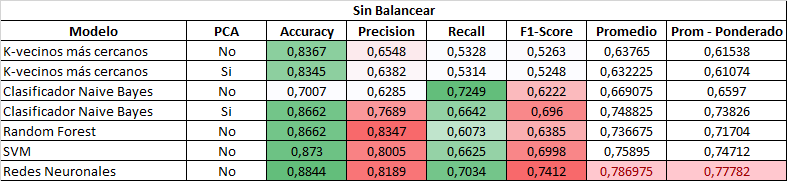

Reconstruimos el mejor modelo

In [270]:
best_model_rn = MLPClassifier(activation='tanh',
                        alpha= 0.1,
                        hidden_layer_sizes= (100, 50, 25),
                        learning_rate= 'constant',
                        max_iter= 500,
                        solver= 'sgd')

In [271]:
best_model_rn.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.



MLPClassifier(activation='tanh', alpha=0.1, hidden_layer_sizes=(100, 50, 25),
              max_iter=500, solver='sgd')

In [272]:
best_model_rn.score(X_test, y_test)

0.8866213151927438

In [273]:
y_pred = best_model_rn.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
list_confusion_matrix(cnf_matrix, ['No', 'Yes'])

Valor predicho    
                           No Yes
Valor real No             359  11
           Yes             39  32

In [274]:
print(classification_report(y_test,    
                            y_pred,                                
                            target_names=['No', 'Yes'],  
                            digits=4)) 

              precision    recall  f1-score   support

          No     0.9020    0.9703    0.9349       370
         Yes     0.7442    0.4507    0.5614        71

    accuracy                         0.8866       441
   macro avg     0.8231    0.7105    0.7481       441
weighted avg     0.8766    0.8866    0.8748       441



## **Importancia de las caracteristicas**

In [276]:
grid_rf_sin_pca.best_estimator_.feature_importances_

array([0.05948007, 0.04573367, 0.02881046, 0.04130072, 0.04965509,
       0.03971257, 0.03195792, 0.02748503, 0.04787894, 0.02004605,
       0.0451054 , 0.02974898, 0.02286366, 0.03294855, 0.0066103 ,
       0.00697538, 0.00626764, 0.00112334, 0.00471447, 0.00640067,
       0.00384459, 0.00754468, 0.00547794, 0.00711574, 0.00199326,
       0.00088848, 0.00727433, 0.00469166, 0.00723409, 0.00181195,
       0.00737489, 0.0128927 , 0.00673625, 0.0069946 , 0.00727139,
       0.00609429, 0.00579278, 0.00661104, 0.00414226, 0.00709411,
       0.00590428, 0.02216503, 0.00864688, 0.00565955, 0.00194592,
       0.00020648, 0.00509216, 0.00124285, 0.0059411 , 0.00380958,
       0.00270171, 0.0014635 , 0.00612462, 0.00703065, 0.0086766 ,
       0.01476021, 0.00353073, 0.00581171, 0.01314903, 0.00597753,
       0.00839761, 0.011686  , 0.03823911, 0.02834405, 0.00474088,
       0.00301652, 0.00773122, 0.00873396, 0.00786828, 0.01053812,
       0.02498206, 0.01183151, 0.00458609, 0.0020535 , 0.00686

In [277]:
np.array(X_full_train_df.columns)

array(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'Education_1', 'Education_2', 'Education_3',
       'Education_4', 'Education_5', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'EnvironmentSatisfaction_1',
       'EnvironmentSatisfaction_2', 'EnvironmentSatisfaction_3',
       'EnvironmentSatisfaction_4', 'Gender_Female', 'Gender_Male',
       'JobInvolvement_1', 'JobInvolvement_2', 'Jo

In [280]:
df_importancias = pd.DataFrame(data=list(zip(np.array(X_full_train_df.columns),grid_rf_sin_pca.best_estimator_.feature_importances_)), columns=['columna', 'importancia'])
df_importancias = df_importancias.sort_values('importancia', ascending=False)

In [281]:
df_importancias

,columna,importancia
0,Age,0.059480
4,MonthlyIncome,0.049655
8,TotalWorkingYears,0.047879
1,DailyRate,0.045734
10,YearsAtCompany,0.045105
...,...,...
51,JobRole_Research Director,0.001463
47,JobRole_Human Resources,0.001243
17,Department_Human Resources,0.001123
25,EducationField_Human Resources,0.000888


In [282]:
px.bar(df_importancias, x = 'columna', y = 'importancia')

In [314]:
estimatorAccuracy=[]
for i in range(len(grid_rf_sin_pca.best_estimator_.estimators_)):
  y_pred = ['Yes' if a==1 else 'No' for a in grid_rf_sin_pca.best_estimator_.estimators_[i].predict(X_test)]
  estimatorAccuracy.append(accuracy_score(y_test,y_pred))

estimatorAccuracy=pd.DataFrame(estimatorAccuracy,columns=['Accuracy'])
estimatorAccuracy.sort_values(inplace=True,by='Accuracy',ascending=False)
estimatorAccuracy.head()

,Accuracy
48,0.800454
8,0.795918
25,0.780045
7,0.780045
0,0.777778


In [351]:
grid_rf_sin_pca.best_estimator_.estimators_[48]

DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_split=6, random_state=767692758)

In [353]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_split=6, random_state=767692758)

In [362]:
X_categoric = X[cols_categoric].values
X_numeric = X[cols_numeric].values

In [363]:
encoder = OneHotEncoder(sparse=False)     # Declaramos el Transformer "OneHotEncoder".
X_categoric_onehot = encoder.fit_transform(X_categoric) # Usamos "fit_transform" para obtener la matriz transformada.
print(X_categoric_onehot.shape)

(1470, 64)


In [364]:
X_full = np.concatenate((X_numeric, X_categoric_onehot),
                        axis=1) # Concatenamos por el eje vertical (columnas)
print(X_full.shape)

(1470, 78)


In [365]:
names_out_cols_categoric = encoder.get_feature_names_out(cols_categoric)
new_cols_names = np.concatenate((cols_numeric, names_out_cols_categoric), axis=None)

In [366]:
X_full_df = pd.DataFrame(data=X_full, columns=new_cols_names)
X_full_df

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_1,Education_2,Education_3,Education_4,Education_5,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,Gender_Female,Gender_Male,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,PerformanceRating_3,PerformanceRating_4,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,41.0,1102.0,1.0,94.0,5993.0,19479.0,8.0,11.0,8.0,0.0,6.0,4.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,49.0,279.0,8.0,61.0,5130.0,24907.0,1.0,23.0,10.0,3.0,10.0,7.0,1.0,7.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,37.0,1373.0,2.0,92.0,2090.0,2396.0,6.0,15.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,33.0,1392.0,3.0,56.0,2909.0,23159.0,1.0,11.0,8.0,3.0,8.0,7.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,27.0,591.0,2.0,40.0,3468.0,16632.0,9.0,12.0,6.0,3.0,2.0,2.0,2.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,884.0,23.0,41.0,2571.0,12290.0,4.0,17.0,17.0,3.0,5.0,2.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,39.0,613.0,6.0,42.0,9991.0,21457.0,4.0,15.0,9.0,5.0,7.0,7.0,1.0,7.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1

In [367]:
dt_model.fit(X_full,y)

DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_split=6, random_state=767692758)

In [373]:
# Función de utilidad para la visualización de archivos SVG en notebooks.
from IPython.display import SVG

# Importamos la función de generación del archivo de descripción del árbol.
from sklearn.tree import export_graphviz

graphviz_data = export_graphviz(dt_model, # Árbol de decisión entrenado.
                                out_file=None,      # Se usa 'None' para generar un string con el resultado.
                                feature_names=X_full_df.columns,  # Nombre de las características.
                                class_names=['No', 'Yes'],     # Nombre de las clases.
                                 # Configuración de estilo.
                                filled=True, rounded=True, special_characters=True)  

# Generamos el grafo de graphviz para la visualización.
graph = graphviz.Source(graphviz_data)
graph.render('tree1', format='svg',view=True)
# Exportamos en formato svg y visualizamos con IPython.
#SVG(graph.pipe(format='svg'))

In [372]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data = export_graphviz(dt_model,
                           feature_names=X_full_train_df.columns)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

Más detalles sobre Importancia de las caracteristicas en las imágenes adjuntas. (No se ponen en el notebook, debido a que son muy grandes y no se puede visualizar cómodamente)